## 아이디어

- 30타석 기준으로 자르기
- batter를 기준 데이터로
- 연봉은 제일 최신 연봉?
- hts : 최고타구속도, 평균각도, 배럴갯수, 배럴타구율

In [106]:
# 한글 출력

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [1]:
import pandas as pd

schedule = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_경기일정_2021.csv', encoding='cp949')
player_18 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018.csv', encoding='cp949')
player_19 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019.csv', encoding='cp949')
player_20 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020.csv', encoding='cp949')
player_21 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021.csv', encoding='cp949')
batter_18 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv', encoding='cp949')
batter_19 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv', encoding='cp949')
batter_20 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv', encoding='cp949')
batter_21 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv', encoding='cp949')
team = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv', encoding='cp949')
hts_18 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv', encoding='cp949')
hts_19 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv', encoding='cp949')
hts_20 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv', encoding='cp949')
hts_21 = pd.read_csv('./Train/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv', encoding='cp949')
# valid = pd.read_excel('./Valid/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_평가데이터.xlsx')

In [2]:
schedule

,G_ID,GDAY_DS,VISIT_KEY,HOME_KEY,HEADER_NO,GWEEK,STADIUM,ACG
0,20210403SSWO0,20210403.0,SS,WO,0,토,고척,1
1,20210404HHKT0,20210404.0,HH,KT,0,일,수원,1
2,20210404HTOB0,20210404.0,HT,OB,0,일,잠실,1
3,20210404LGNC0,20210404.0,LG,NC,0,일,창원,1
4,20210404LTSK0,20210404.0,LT,SK,0,일,문학,1
...,...,...,...,...,...,...,...,...
715,NaN,NaN,KT,WO,0,NaN,고척,2
716,NaN,NaN,NC,WO,0,NaN,고척,2
717,NaN,NaN,NC,WO,0,NaN,고척,2
718,NaN,NaN,NC,WO,0,NaN,고척,2


In [63]:
player[player['PCODE'] == 68345]

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
398,2018,68345,샌즈,WO,외,30,90000달러
367,2019,68345,샌즈,WO,외,31,400000달러


In [4]:
batter_20.head()

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD
0,2020,50054,66,77,69,0.203,14,0,17,0.246,0,7,15,0,1,0
1,2020,50066,26,32,30,0.200,6,1,11,0.367,0,2,11,0,0,1
2,2020,50150,23,31,30,0.367,11,0,13,0.433,0,1,6,0,0,2
3,2020,50165,117,494,431,0.278,120,38,255,0.592,4,55,136,5,4,7
4,2020,50202,68,41,37,0.270,10,0,10,0.270,1,2,5,0,0,1


In [5]:
hts_21.describe()

,GYEAR,PCODE,INN,HIT_VEL,HIT_ANG_VER,PIT_VEL
count,17964.0,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2021.0,67633.956468,4.975006,134.391496,17.573859,135.868189
std,0.0,8406.789409,2.573506,19.476600,23.833166,9.126255
min,2021.0,50054.000000,1.000000,27.460000,-56.500000,97.220000
25%,2021.0,62925.000000,3.000000,122.940000,-1.400000,129.420000
50%,2021.0,66965.000000,5.000000,137.835000,14.400000,137.600000
75%,2021.0,75847.000000,7.000000,149.030000,32.100000,142.980000
max,2021.0,79608.000000,12.000000,176.820000,89.500000,155.840000


In [6]:
player = pd.concat([player_18, player_19, player_20, player_21])
batter = pd.concat([batter_18, batter_19, batter_20, batter_21])
hts = pd.concat([hts_18, hts_19, hts_20, hts_21])

In [7]:
hts

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
17959,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
17960,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
17961,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
17962,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


---

# 1. 배럴 모형 설정

- MLB와 KBO의 평균 타구속도 및 발사각도 비교
    - MLB와 KBO의 평균 타구속도/ 발사각도 비교
- 장타(홈런, 2루타, 3루타)의 평균 타구속도와 평균 발사각도 / 각각의 분포
- OPS 상위타자들의 평균 타구속도와 평균 타구각도

### 1. MLB와 KBO의 평균 타구속도 비교
- MLB 2018 ~ 2021 시즌데이터 (8월 12일기준)

In [8]:
mlb_bat = pd.read_csv('./mlb_batters.csv')
mlb_bat.head()

,last_name,first_name,player_id,year,slg_percent,on_base_percent,on_base_plus_slg,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,Unnamed: 12
0,Pujols,Albert,405395,2019,0.430,0.305,0.734,88.3,12.5,26.5,5.8,36.6,NaN
1,Cabrera,Miguel,408234,2019,0.398,0.346,0.744,90.4,12.3,37.7,6.7,44.6,NaN
2,Mathis,Jeff,425772,2019,0.224,0.209,0.433,86.1,16.9,29.6,1.4,26.4,NaN
3,Choo,Shin-Soo,425783,2019,0.455,0.371,0.826,91.9,9.1,32.1,9.0,48.7,NaN
4,Wainwright,Adam,425794,2019,0.220,0.169,0.389,87.9,14.6,27.0,0.0,22.2,NaN


- MLB 평균 타구속도

In [9]:
# mph단위를 km/h로 변환
mlb_bat['exit_velocity_avg'] = mlb_bat['exit_velocity_avg'] * 1.609344
mlb_bat['exit_velocity_avg'].mean()

141.95960453135214

- KBO 평균 타구속도

In [10]:
hts['HIT_VEL'].mean()

133.73217549380928

- 평균타구속도는 MLB 약 141.96km/h, KBO 약 133.73km/h로 약 8.23km/h 차이

### 2. MLB와 KBO의 평균 발사각도 비교
- MLB 평균 발사각도

In [11]:
mlb_bat['launch_angle_avg'].mean()

12.152253590886579

- KBO 평균 발사각도

In [12]:
hts['HIT_ANG_VER'].mean()

17.39440390906456

- 평균발사각도는 MLB 약 12.15도, KBO 약 17.39도로 약 -5.24도 차이

### 3. 장타(홈런, 2루타, 3루타)의 평균 타구속도와 평균 발사각도 / 각각의 분포
- 장타만 포함하는 dataframe 생성

In [13]:
hts_hr = hts[hts['HIT_RESULT'] == '홈런']
hts_2b = hts[hts['HIT_RESULT'] == '2루타']
hts_3b = hts[hts['HIT_RESULT'] == '3루타']
hts_slg = pd.concat([hts_hr, hts_2b, hts_3b])

# 5도 이하 타구는 제외, 수비 시프트의 영향이나 빠른 발을 통한 장타 제외 위함
hts_slg = hts_slg[hts_slg['HIT_ANG_VER'] > 5]
hts_slg.describe()

,GYEAR,PCODE,INN,HIT_VEL,HIT_ANG_VER,PIT_VEL
count,12614.000000,12614.000000,12614.000000,12614.000000,12614.000000,12614.000000
mean,2019.243380,69916.794990,4.937926,150.255418,22.771405,135.926508
std,1.060032,7296.372388,2.564484,12.134729,8.662602,9.030125
min,2018.000000,50054.000000,1.000000,74.760000,5.100000,97.920000
25%,2018.000000,64153.000000,3.000000,145.340000,16.500000,129.840000
50%,2019.000000,69453.000000,5.000000,152.240000,22.700000,137.790000
75%,2020.000000,76290.000000,7.000000,157.870000,28.300000,142.900000
max,2021.000000,99810.000000,12.000000,180.810000,65.400000,156.280000


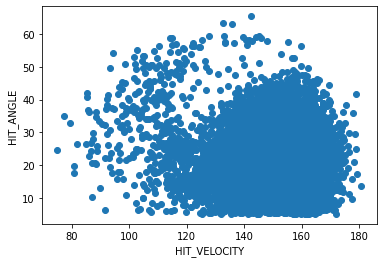

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.scatter(x = hts_slg['HIT_VEL'], y = hts_slg['HIT_ANG_VER'])
plt.ylabel('HIT_ANGLE')
plt.xlabel('HIT_VELOCITY')
plt.show()

- 타구속도 : 120km ~ 170km 사이
- 발사각도 : 10도 ~ 40도 사이

#### 홈런의 평균 타구속도와 평균 발사각도 및 분포

In [15]:
hts_hr.describe()

,GYEAR,PCODE,INN,HIT_VEL,HIT_ANG_VER,PIT_VEL
count,4732.000000,4732.000000,4732.000000,4732.000000,4732.000000,4732.000000
mean,2019.214074,70138.792265,4.929628,155.275731,28.781255,135.745336
std,1.085457,7201.657006,2.558533,7.373702,5.625442,9.020993
min,2018.000000,50066.000000,1.000000,131.130000,15.500000,97.920000
25%,2018.000000,64300.000000,3.000000,150.320000,24.700000,129.620000
50%,2019.000000,70654.500000,5.000000,155.430000,28.200000,137.785000
75%,2020.000000,76232.000000,7.000000,160.300000,32.400000,142.800000
max,2021.000000,99810.000000,12.000000,179.020000,50.100000,155.900000


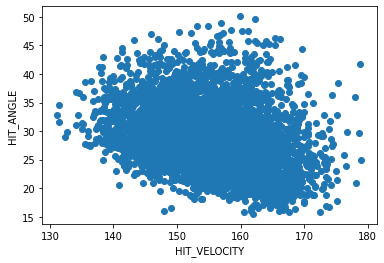

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = hts_hr['HIT_VEL'], y = hts_hr['HIT_ANG_VER'])
plt.ylabel('HIT_ANGLE')
plt.xlabel('HIT_VELOCITY')
plt.show()

- 타구속도 : 145km/h ~ 165km/h
- 발사각도 : 23도 ~ 35도
- 이 데이터를 KBO 배럴모형의 중심점으로 잡을 예정

### 4. OPS 상위타자들의 평균 타구속도와 평균 발사각도
- OPS 순위 구하기 (출루율 계산하여 장타율과 합산)
- 출루율 : (안타 + 볼넷 + 사구) / (총 타석)

In [17]:
batter.head()

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0


In [18]:
batter['OBP'] = (batter['HIT'] + batter['BB'] + batter['HP']) / batter['PA']
batter['OPS'] = batter['SLG'] + batter['OBP']
batter.head()

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,OBP,OPS
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5,0.313609,0.727609
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0,0.200000,0.500000
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0,0.000000,0.000000
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3,0.264368,0.653368
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0,0.625000,1.125000


- 선수별 평균 타구속도 및 발사각도 계산

In [19]:
hts_vel_grouped = hts.groupby(['GYEAR','PCODE'])['HIT_VEL'].mean()

In [20]:
hts_ang_grouped = hts.groupby(['GYEAR','PCODE'])['HIT_ANG_VER'].mean()

In [21]:
hts_vel_grouped = pd.DataFrame(hts_vel_grouped, columns=['HIT_VEL'])
hts_vel_grouped

HIT_VEL
GYEAR PCODE            
2018  60100  133.443196
      60184  137.428571
      60288   74.480000
      60343  132.035327
      60456  114.366667
...                 ...
2021  79290  130.472500
      79365  138.122803
      79402  132.975543
      79456  128.290323
      79608  137.182169

[1065 rows x 1 columns]

In [22]:
hts_ang_grouped = pd.DataFrame(hts_ang_grouped, columns=['HIT_ANG_VER'])
hts_ang_grouped

HIT_ANG_VER
GYEAR PCODE             
2018  60100    26.607216
      60184    25.814286
      60288    -2.400000
      60343    22.157944
      60456     9.566667
...                  ...
2021  79290    18.600000
      79365    18.375000
      79402    16.495429
      79456    10.256989
      79608    15.545783

[1065 rows x 1 columns]

In [23]:
batter.shape

(1098, 18)

In [24]:
batter = pd.merge(batter, hts_vel_grouped, how='left', on = ['GYEAR','PCODE'])
batter = pd.merge(batter, hts_ang_grouped, how='left', on = ['GYEAR','PCODE'])
batter

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,OBP,OPS,HIT_VEL,HIT_ANG_VER
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5,0.313609,0.727609,133.443196,26.607216
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0,0.200000,0.500000,137.428571,25.814286
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0,0.000000,0.000000,74.480000,-2.400000
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3,0.264368,0.653368,132.035327,22.157944
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0,0.625000,1.125000,114.366667,9.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2021,79290,4,8,8,0.125,1,0,1,0.125,0,0,2,0,0,0,0.125000,0.250000,130.472500,18.600000
1094,2021,79365,73,261,219,0.265,58,16,117,0.534,1,32,69,0,6,5,0.367816,0.901816,138.122803,18.375000
1095,2021,79402,70,278,237,0.211,50,1,61,0.257,0,30,26,0,3,7,0.298561,0.555561,132.975543,16.495429
1096,2021,79456,62,135,124,0.274,34,0,38,0.306,2,7,11,1,1,5,0.311111,0.617111,128.290323,10.256989


- 각 연도 OPS 상위 10명의 평균 타구속도와 평균 발사각도
    - 단, 250타석 이상 선수들 (2021시즌의 경우, 150타석 이상 선수들)만 포함

In [25]:
is_18 = batter['GYEAR'] == 2018
is_19 = batter['GYEAR'] == 2019
is_20 = batter['GYEAR'] == 2020
is_21 = batter['GYEAR'] == 2021
upper_250 = batter['PA'] >= 250
upper_150 = batter['PA'] >= 150

In [26]:
ops_top18 = batter[is_18 & upper_250]
ops_top18 = ops_top18.sort_values(by='OPS', ascending=False)
ops_top19 = batter[is_19 & upper_250]
ops_top19 = ops_top19.sort_values(by='OPS', ascending=False)
ops_top20 = batter[is_20 & upper_250]
ops_top20 = ops_top20.sort_values(by='OPS', ascending=False)
ops_top21 = batter[is_21 & upper_150]
ops_top21 = ops_top21.sort_values(by='OPS', ascending=False)

In [27]:
top_avg_vel = 0.0
top_avg_ang = 0.0
for df in [ops_top18, ops_top19, ops_top20, ops_top21]:
    top_avg_vel += df['HIT_VEL'].mean()
    top_avg_ang += df['HIT_ANG_VER'].mean()
    print('YEAR : {}, VEL : {}, ANG : {}'.format(int(df['GYEAR'].mean()), df['HIT_VEL'].mean(), df['HIT_ANG_VER'].mean()))

top_avg_vel = top_avg_vel / 4
top_avg_ang = top_avg_ang / 4
print('VEL : {} , ANG : {}'.format(top_avg_vel, top_avg_ang))

YEAR : 2018, VEL : 132.85103146872495, ANG : 16.170931201988452
YEAR : 2019, VEL : 134.3265516540781, ANG : 17.37383766081077
YEAR : 2020, VEL : 135.16070912476388, ANG : 18.317920121924686
YEAR : 2021, VEL : 134.76025100109783, ANG : 17.757597277315757
VEL : 134.2746358121662 , ANG : 17.405071565509918


## 정리

1. MLB와 KBO의 평균 타구속도 / 발사각도 비교
    - 평균타구속도는 MLB 약 141.96km/h, KBO 약 133.73km/h로 약 8.23km/h 차이
    - 평균발사각도는 MLB 약 12.15도, KBO 약 17.39도로 약 -5.24도 차이
    - __KBO는 MLB보다 평균 타구속도가 느리므로, 배럴타구를 만드는 데 있어 MLB의 기준보다 최소 타구속도 기준이 낮고 다소 좁은 발사각이 필요하다.__
    
---
    
2. 장타(홈런, 2루타, 3루타)의 평균 타구속도와 평균 발사각도 / 각각의 분포
    - 장타 (홈런, 2루타, 3루타 포함 / 발사각도 5도이상)의 분포는 대부분 타구속도 : 120km ~ 170km 사이, 발사각도 : 10도 ~ 40도 사이
    - 홈런의 분포는 대부분 타구속도 : 145km/h ~ 165km/h, 발사각도 : 23도 ~ 35도
    - __장타의 분포를 배럴모형의 큰 범위, 홈런의 분포를 배럴모형의 중심점으로 잡아 모형 설정__
    
---
    
3. OPS 상위타자들의 평균 타구속도와 평균 발사각도
    - 기준연도 ('18 ~ '21)의 OPS 상위 10명의 평균 타구속도와 평균 발사각도
    - 2018 : 132.85Km/h, 16.17도
    - 2019 : 134.33Km/h, 17.37도
    - 2020 : 135.16Km/h, 18.32도
    - 2021 : 134.76Km/h, 17.76도
    - '18 ~ '21 : 134.27Km/h, 17.41도
    
## 배럴모형 설정
- 시작점 : 최소 타구속도 145km/h, 발사각도 23 ~ 25도 
    - 타구속도 171km/h 일때 16.5도에서 38도 범위
- 1km/h 당 각도 + 0.5도, - 0.25도

In [28]:
hts['Barrel'] = 0

In [29]:
import numpy as np

for i in range(145, 182):
    is_barrel = (hts['HIT_VEL'] >= i) & (hts['HIT_ANG_VER'] >= (23 - (0.25 * (i - 145)))) & (hts['HIT_ANG_VER'] <= (25 + (0.5 * (i - 145))))
    hts['Barrel'] = np.where(is_barrel, 1, hts['Barrel'])

In [30]:
barrel = hts[hts['Barrel'] == 1]

In [31]:
hts

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,Barrel
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,0
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,0
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,0
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,0
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17959,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구,0
17960,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구,0
17961,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구,0
17962,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구,1


### 모형 검증

In [32]:
barrel_hr = barrel[barrel['HIT_RESULT'] == '홈런'] # 2578
barrel_2b = barrel[barrel['HIT_RESULT'] == '2루타'] # 1148
barrel_3b = barrel[barrel['HIT_RESULT'] == '3루타'] # 94
barrel_1b = barrel[barrel['HIT_RESULT'] == '1루타'] # 89
barrel_inb = barrel[barrel['HIT_RESULT'] == '내야안타(1루타)'] # 0

In [33]:
barrel.shape

(5053, 12)

In [34]:
# 배럴타구의 타율
(barrel_hr.shape[0] + barrel_1b.shape[0] + barrel_2b.shape[0] + barrel_3b.shape[0]) / barrel.shape[0]

0.7735998416782109

In [35]:
# 배럴타구의 장타율
(barrel_hr.shape[0] * 4 + barrel_1b.shape[0] + barrel_2b.shape[0] * 2 + barrel_3b.shape[0] * 3) / barrel.shape[0]

2.5685731248763113

- barrel 타구 총 5053개 중 3909개의 타구가 안타 (타율 .774)
- barrel 타구의 장타율은 2.569
- 2016년 MLB의 배럴타구는 타율 .822와 장타율 2.386을 기록하기도 했음
    - https://www.mlb.com/glossary/statcast/barrel

### 배럴 컬럼 생성
- 배럴타구의 갯수
- 배럴비율(%)

In [36]:
# 배럴타구 개수 groupby
barrel_grouped = hts.groupby(['GYEAR','PCODE'])['Barrel'].sum()
barrel_grouped = pd.DataFrame(barrel_grouped, columns=['Barrel'])
barrel_grouped

Barrel
GYEAR PCODE        
2018  60100       4
      60184       0
      60288       0
      60343       1
      60456       0
...             ...
2021  79290       0
      79365      11
      79402       1
      79456       0
      79608       4

[1065 rows x 1 columns]

In [37]:
batter = pd.merge(batter, barrel_grouped, how='left', on = ['GYEAR','PCODE'])
batter

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,...,BB,KK,IB,HP,GD,OBP,OPS,HIT_VEL,HIT_ANG_VER,Barrel
0,2018,60100,70,169,152,0.243,37,3,63,0.414,...,12,36,0,4,5,0.313609,0.727609,133.443196,26.607216,4.0
1,2018,60184,6,10,10,0.200,2,0,3,0.300,...,0,3,0,0,0,0.200000,0.500000,137.428571,25.814286,0.0
2,2018,60288,1,1,1,0.000,0,0,0,0.000,...,0,0,0,0,0,0.000000,0.000000,74.480000,-2.400000,0.0
3,2018,60343,83,174,162,0.216,35,8,63,0.389,...,8,49,0,3,3,0.264368,0.653368,132.035327,22.157944,1.0
4,2018,60456,4,8,6,0.500,3,0,3,0.500,...,2,0,0,0,0,0.625000,1.125000,114.366667,9.566667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2021,79290,4,8,8,0.125,1,0,1,0.125,...,0,2,0,0,0,0.125000,0.250000,130.472500,18.600000,0.0
1094,2021,79365,73,261,219,0.265,58,16,117,0.534,...,32,69,0,6,5,0.367816,0.901816,138.122803,18.375000,11.0
1095,2021,79402,70,278,237,0.211,50,1,61,0.257,...,30,26,0,3,7,0.298561,0.555561,132.975543,16.495429,1.0
1096,2021,79456,62,135,124,0.274,34,0,38,0.306,...,7,11,1,1,5,0.311111,0.617111,128.290323,10.256989,0.0


In [38]:
# 배럴타구 비율 칼럼 생성
batter['Barrel%'] = batter['Barrel'] / batter['AB'] * 100
batter

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,...,KK,IB,HP,GD,OBP,OPS,HIT_VEL,HIT_ANG_VER,Barrel,Barrel%
0,2018,60100,70,169,152,0.243,37,3,63,0.414,...,36,0,4,5,0.313609,0.727609,133.443196,26.607216,4.0,2.631579
1,2018,60184,6,10,10,0.200,2,0,3,0.300,...,3,0,0,0,0.200000,0.500000,137.428571,25.814286,0.0,0.000000
2,2018,60288,1,1,1,0.000,0,0,0,0.000,...,0,0,0,0,0.000000,0.000000,74.480000,-2.400000,0.0,0.000000
3,2018,60343,83,174,162,0.216,35,8,63,0.389,...,49,0,3,3,0.264368,0.653368,132.035327,22.157944,1.0,0.617284
4,2018,60456,4,8,6,0.500,3,0,3,0.500,...,0,0,0,0,0.625000,1.125000,114.366667,9.566667,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2021,79290,4,8,8,0.125,1,0,1,0.125,...,2,0,0,0,0.125000,0.250000,130.472500,18.600000,0.0,0.000000
1094,2021,79365,73,261,219,0.265,58,16,117,0.534,...,69,0,6,5,0.367816,0.901816,138.122803,18.375000,11.0,5.022831
1095,2021,79402,70,278,237,0.211,50,1,61,0.257,...,26,0,3,7,0.298561,0.555561,132.975543,16.495429,1.0,0.421941
1096,2021,79456,62,135,124,0.274,34,0,38,0.306,...,11,1,1,5,0.311111,0.617111,128.290323,10.256989,0.0,0.000000


---
# 2. EDA & Feature Engineering

## 선수정보 (player data) merge
- batter data에 player data 중 POSITION, AGE_VA, MONEY 칼럼 포함하도록 merge

In [68]:
# player = player.drop(['NAME', 'T_ID'], axis=1)
player

,GYEAR,PCODE,POSITION,AGE_VA,MONEY
0,2018,60100,외,30,5000만원
1,2018,60105,투,26,3200만원
2,2018,60140,투,31,10500만원
3,2018,60146,투,26,7000만원
4,2018,60181,투,30,9000만원
...,...,...,...,...,...
642,2021,79456,포,35,30000만원
643,2021,79545,투,32,7500만원
644,2021,79608,내,31,29000만원
645,2021,79764,투,31,10000만원


In [69]:
batter = pd.merge(batter, player, how='left', on = ['GYEAR','PCODE'])

In [70]:
batter

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,...,HP,GD,OBP,HIT_VEL,HIT_ANG_VER,Barrel,Barrel%,POSITION,AGE_VA,MONEY
0,2018,60100,70,169,152,0.243,37,3,63,0.414,...,4,5,0.313609,133.443196,26.607216,4.0,2.631579,외,30,5000만원
1,2018,60343,83,174,162,0.216,35,8,63,0.389,...,3,3,0.264368,132.035327,22.157944,1.0,0.617284,포,31,7100만원
2,2018,60523,91,194,174,0.305,53,7,86,0.494,...,1,4,0.360825,137.392119,16.722881,8.0,4.597701,내,30,10000만원
3,2018,60605,56,87,76,0.263,20,1,29,0.382,...,0,2,0.321839,121.912857,15.414286,2.0,2.631579,내,31,3500만원
4,2018,61186,112,405,359,0.340,122,2,156,0.435,...,3,11,0.404938,128.736169,9.210484,9.0,2.506964,외,29,8000만원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021,79240,69,301,279,0.323,90,4,122,0.437,...,3,12,0.368771,133.992522,11.815929,4.0,1.433692,내,30,100000만원
486,2021,79365,73,261,219,0.265,58,16,117,0.534,...,6,5,0.367816,138.122803,18.375000,11.0,5.022831,포,31,23000만원
487,2021,79402,70,278,237,0.211,50,1,61,0.257,...,3,7,0.298561,132.975543,16.495429,1.0,0.421941,내,31,25000만원
488,2021,79456,62,135,124,0.274,34,0,38,0.306,...,1,5,0.311111,128.290323,10.256989,0.0,0.000000,포,35,30000만원


## 타석 기준 판단하기

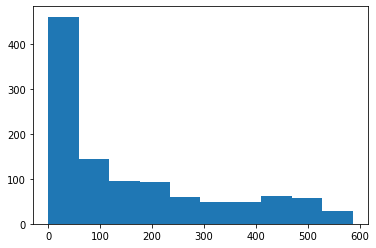

In [39]:
plt.hist(batter['AB'])
plt.show()

- 대부분의 선수들이 100타석 미만이지만, 예측기간이 9/15 ~ 10/8(약 3주)이라는 점을 감안해야 함
- 현재 팀당 21경기 (더블헤더 제외) 예상, 규정타석은 21 * 3.1 = 65.1(타석)
- 최소 65타석의 기회는 있어야 정상적인 판단 가능

In [40]:
# 65타석 미만의 타자 성적 삭제
batter = batter[batter['AB'] >= 65]
batter['AB'].min()

65

- 단순 합계 칼럼인 OPS 칼럼삭제

In [41]:
batter = batter.drop('OPS', axis=1)

## 상관계수 확인

### 장타율 상관계수

In [71]:
corrmat = batter.corr()
corr_columns = corrmat.index[abs(corrmat['SLG']) >= 0.5] # 상관계수 0.5 이상만 포함 (절댓값 기준)
corr_columns

Index(['BA', 'HIT', 'HR', 'TOTB', 'SLG', 'OBP', 'Barrel', 'Barrel%'], dtype='object')

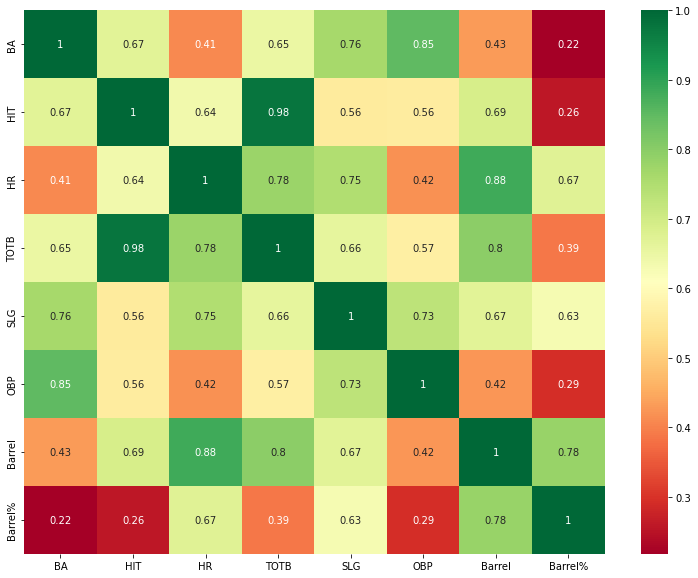

In [72]:
# 히트맵
import seaborn as sns

plt.figure(figsize=(13,10))
heatmap = sns.heatmap(batter[corr_columns].corr(),annot=True,cmap="RdYlGn")

### 출루율 상관계수

In [73]:
corrmat = batter.corr()
corr_columns = corrmat.index[abs(corrmat['OBP']) >= 0.5] # 상관계수 0.5 이상만 포함 (절댓값 기준)
corr_columns

Index(['BA', 'HIT', 'TOTB', 'SLG', 'BB', 'OBP'], dtype='object')

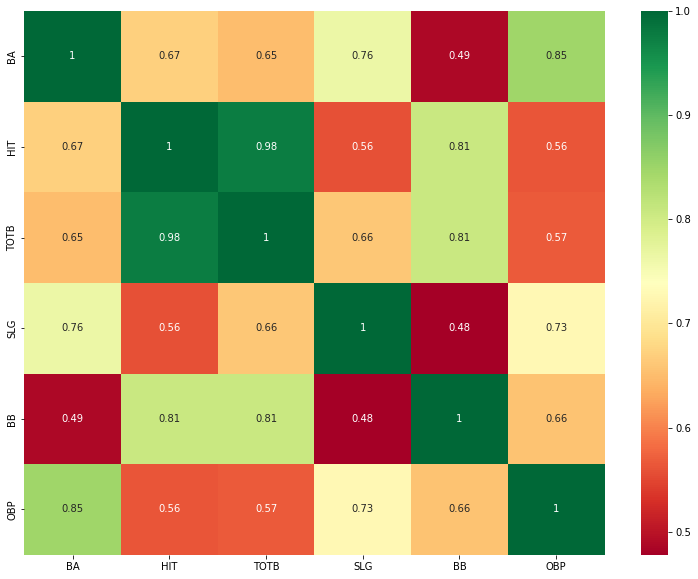

In [74]:
# 히트맵
import seaborn as sns

plt.figure(figsize=(13,10))
heatmap = sns.heatmap(batter[corr_columns].corr(),annot=True,cmap="RdYlGn")

- 타석, 타수 칼럼에 대한 고민
    - 65타석 이상의 선수들 성적이라면, 어느정도 기회를 받은 선수들
    - 타석이 많을수록, 팀의 주축선수라는 말이며 그 선수들일수록 출루율 / 장타율 성적이 높음
    - 하지만, 우리가 예측하고자 하는 선수들(10명)은 모두 팀의 주축타자들이므로 영향이 없는 칼럼일 수 있음
    - 몇 경기 결장한 선수의 경우 오히려 예측값이 떨어질수도...?
    

High correlation with 'SLG, OBP' Pair Plot


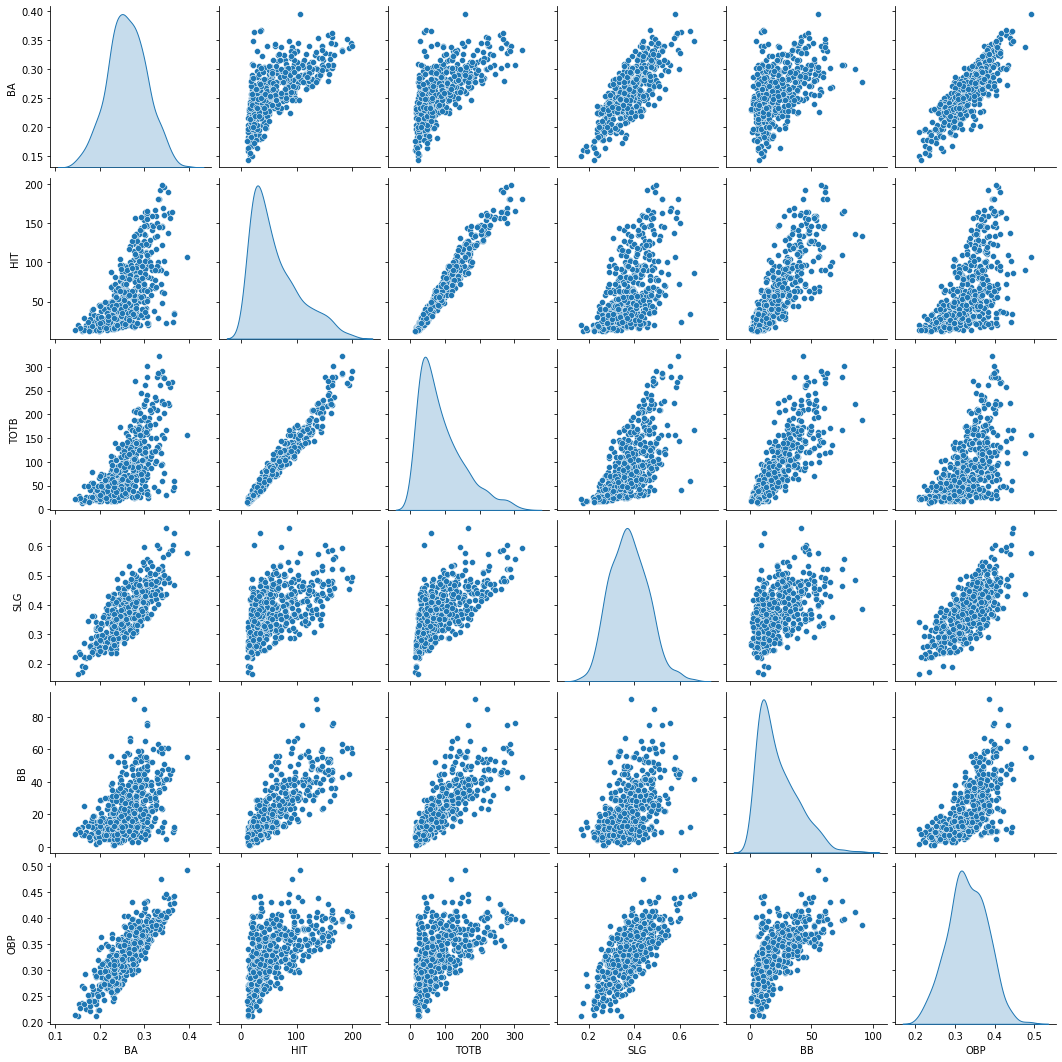

In [75]:
print("High correlation with 'SLG, OBP' Pair Plot")
high_corr = batter.loc[:,list(corr_columns)]
sns.pairplot(high_corr,diag_kind='kde')
plt.show()

- 높은 상관관계를 보이는 칼럼들은 선형성을 보이는 모습.

## 데이터 타입 확인 및 타입변경

In [77]:
batter.dtypes

GYEAR            int64
PCODE            int64
GAMENUM          int64
PA               int64
AB               int64
BA             float64
HIT              int64
HR               int64
TOTB             int64
SLG            float64
SF               int64
BB               int64
KK               int64
IB               int64
HP               int64
GD               int64
OBP            float64
HIT_VEL        float64
HIT_ANG_VER    float64
Barrel         float64
Barrel%        float64
POSITION        object
AGE_VA           int64
MONEY           object
dtype: object

### MONEY (연봉) 칼럼 확인 및 단위 동기화
- '만원' '달러' 단위 빼고 수치형(\)으로 동기화
- '달러' 단위는 환율에 비례해 원 단위로 변경

In [98]:
def change (x) :
    if x[-2:] == '만원':
        return int(x[:-2]) * 10000
    else :
        return round(int(x[:-2]) * 1167, 0)

In [100]:
batter['MONEY'] = batter['MONEY'].apply(change)

In [101]:
batter['MONEY']

0        50000000
1        71000000
2       100000000
3        35000000
4        80000000
          ...    
485    1000000000
486     230000000
487     250000000
488     300000000
489     290000000
Name: MONEY, Length: 490, dtype: int64

## 이상치 제거

In [76]:
batter.columns

Index(['GYEAR', 'PCODE', 'GAMENUM', 'PA', 'AB', 'BA', 'HIT', 'HR', 'TOTB',
       'SLG', 'SF', 'BB', 'KK', 'IB', 'HP', 'GD', 'OBP', 'HIT_VEL',
       'HIT_ANG_VER', 'Barrel', 'Barrel%', 'POSITION', 'AGE_VA', 'MONEY'],
      dtype='object')

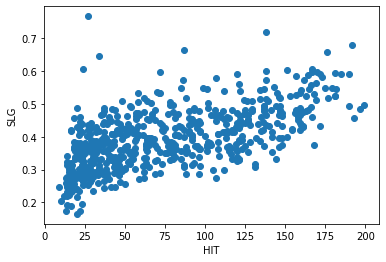

In [47]:
fig, ax = plt.subplots()
ax.scatter(x = batter['HIT'], y = batter['SLG'])
plt.ylabel('SLG')
plt.xlabel('HIT')
plt.show()

- 장타율 0.7이상 삭제

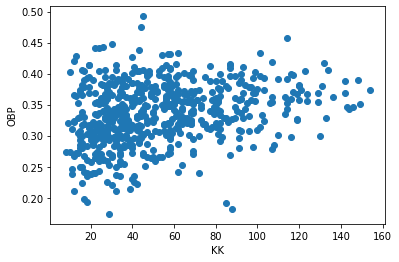

In [48]:
fig, ax = plt.subplots()
ax.scatter(x = batter['KK'], y = batter['OBP'])
plt.ylabel('OBP')
plt.xlabel('KK')
plt.show()

- 삼진 80개이상, 출루율 0.20 이하 삭제

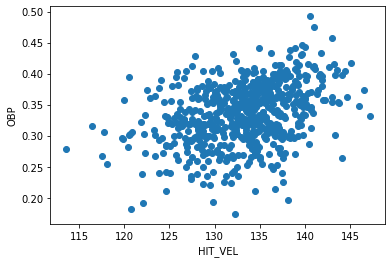

In [49]:
fig, ax = plt.subplots()
ax.scatter(x = batter['HIT_VEL'], y = batter['OBP'])
plt.ylabel('OBP')
plt.xlabel('HIT_VEL')
plt.show()

- HIT_VEL 115이하 삭제

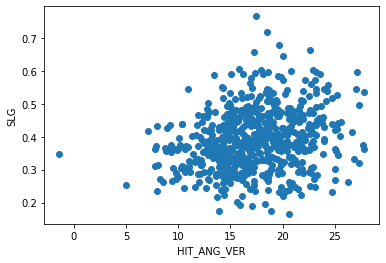

In [50]:
fig, ax = plt.subplots()
ax.scatter(x = batter['HIT_ANG_VER'], y = batter['SLG'])
plt.ylabel('SLG')
plt.xlabel('HIT_ANG_VER')
plt.show()

- HIT_ANG_VER 5도 이하 삭제

In [53]:
batter = batter[batter['SLG'] < 0.7]
batter = batter[(batter['KK'] < 80) & (batter['OBP'] >= 0.2)]
batter = batter[batter['HIT_VEL'] > 115]
batter = batter[batter['HIT_ANG_VER'] > 5]

### 이상치 제거 확인

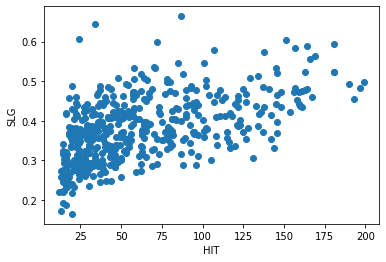

In [54]:
fig, ax = plt.subplots()
ax.scatter(x = batter['HIT'], y = batter['SLG'])
plt.ylabel('SLG')
plt.xlabel('HIT')
plt.show()

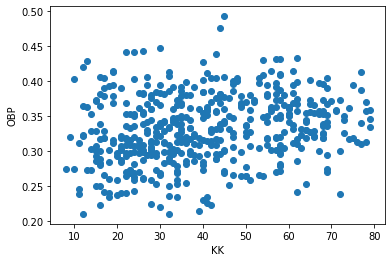

In [55]:
fig, ax = plt.subplots()
ax.scatter(x = batter['KK'], y = batter['OBP'])
plt.ylabel('OBP')
plt.xlabel('KK')
plt.show()

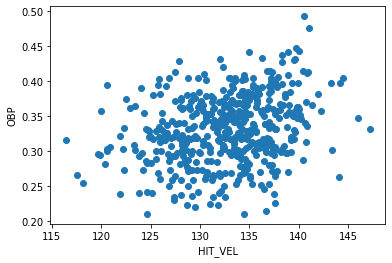

In [56]:
fig, ax = plt.subplots()
ax.scatter(x = batter['HIT_VEL'], y = batter['OBP'])
plt.ylabel('OBP')
plt.xlabel('HIT_VEL')
plt.show()

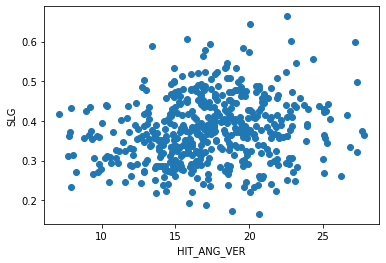

In [57]:
fig, ax = plt.subplots()
ax.scatter(x = batter['HIT_ANG_VER'], y = batter['SLG'])
plt.ylabel('SLG')
plt.xlabel('HIT_ANG_VER')
plt.show()

## Object형 칼럼 살펴보기
- POSITION 데이터

In [102]:
batter_obj= batter.loc[:,list(batter.columns[batter.dtypes=='object'])+['SLG', 'OBP']]

In [105]:
batter_obj

,POSITION,SLG,OBP
0,외,0.414,0.313609
1,포,0.389,0.264368
2,내,0.494,0.360825
3,내,0.382,0.321839
4,외,0.435,0.404938
...,...,...,...
485,내,0.437,0.368771
486,포,0.534,0.367816
487,내,0.257,0.298561
488,포,0.306,0.311111


Text(0.5, 1.0, '포지션별 OPS violinplot')

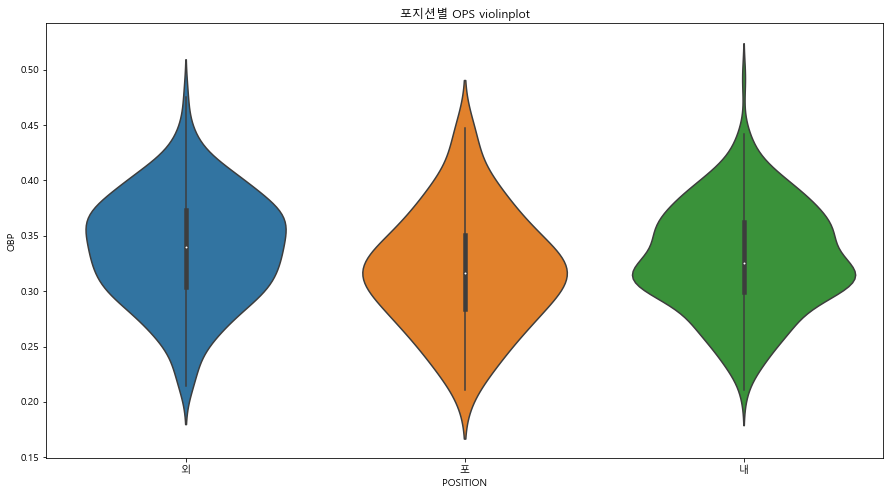

In [107]:
# 포지션별 violinplot 그려보기 (출루율)
plt.figure(figsize=(15,8))
sns.violinplot(x='POSITION',y='OBP',data=batter_obj)
plt.title("포지션별 OPS violinplot")

Text(0.5, 1.0, '포지션별 OPS violinplot')

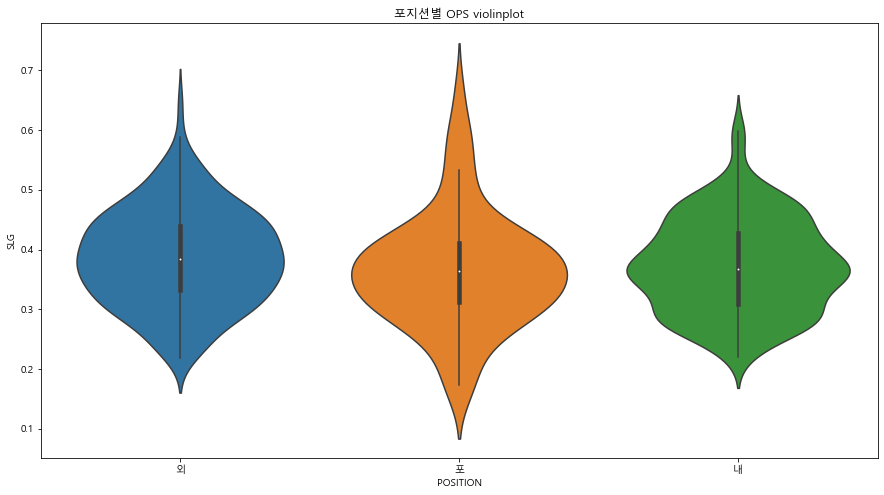

In [108]:
# 포지션별 violinplot 그려보기 (출루율)
plt.figure(figsize=(15,8))
sns.violinplot(x='POSITION',y='SLG',data=batter_obj)
plt.title("포지션별 OPS violinplot")

- 포지션 별 아웃라이어가 돋보이는 포지션은 없는 듯.